In [72]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [77]:
img_array = cv2.imread("Training/sad/Training_175734.jpg")

In [78]:
img_array.shape

(48, 48, 3)

In [79]:
print(img_array)

[[[122 122 122]
  [103 103 103]
  [ 47  47  47]
  ...
  [  8   8   8]
  [  6   6   6]
  [  6   6   6]]

 [[115 115 115]
  [ 81  81  81]
  [ 48  48  48]
  ...
  [  6   6   6]
  [  5   5   5]
  [  6   6   6]]

 [[111 111 111]
  [ 70  70  70]
  [ 61  61  61]
  ...
  [  6   6   6]
  [  6   6   6]
  [  7   7   7]]

 ...

 [[ 90  90  90]
  [ 88  88  88]
  [ 91  91  91]
  ...
  [  7   7   7]
  [  3   3   3]
  [  4   4   4]]

 [[ 89  89  89]
  [ 88  88  88]
  [ 92  92  92]
  ...
  [  7   7   7]
  [  5   5   5]
  [  7   7   7]]

 [[ 89  89  89]
  [ 92  92  92]
  [ 94  94  94]
  ...
  [  6   6   6]
  [  6   6   6]
  [  8   8   8]]]


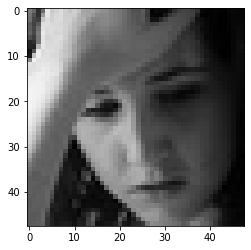

In [80]:
plt.imshow(img_array)

In [81]:
Datadirectory = "Training/"

In [82]:
Classes = ["angry","disgust","fear","happy","neutral","sad","surprise"]

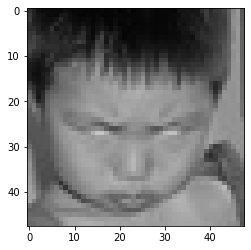

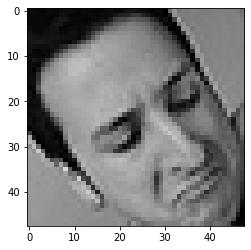

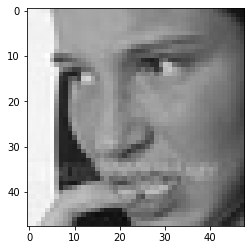

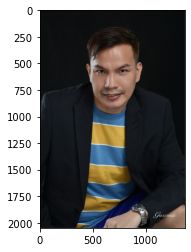

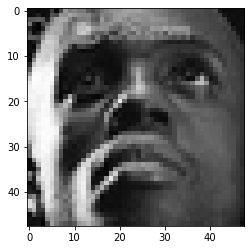

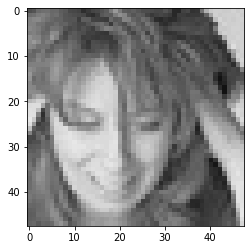

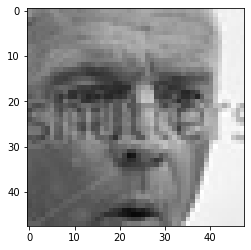

In [84]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
        

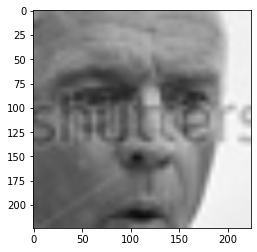

In [85]:
img_size= 224
new_array= cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [86]:
new_array.shape

(224, 224, 3)

In [87]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array= cv2.imread(os.path.join(path,img))
                new_array= cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass
            

In [88]:
create_training_Data()

In [90]:
print(len(training_Data))

28711


In [91]:
dtype=object

In [92]:
import random

random.shuffle(training_Data)

In [93]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [94]:
X.shape

(28711, 224, 224, 3)

In [95]:
type(y)

list

In [96]:
y[1]

2

In [97]:
Y= np.array(y)

In [98]:
Y.shape

(28711,)

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [26]:
model = tf.keras.applications.MobileNetV2()

In [27]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [28]:
base_input = model.layers[0].input

In [29]:
base_output = model.layers[-2].output

In [30]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [31]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)

In [32]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [33]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [34]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [35]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [36]:
new_model.save('my_model_64p35.h5')

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [37]:
new_model.fit(X,Y, epochs = 2)

Epoch 1/2
898/898 [==============================] - 4925s 5s/step - loss: 1.2517 - accuracy: 0.1233
Epoch 2/2
898/898 [==============================] - 4757s 5s/step - loss: 1.0752 - accuracy: 0.1329


In [38]:
frame = cv2.imread("eusebio.jpg")

In [39]:
frame.shape

(1280, 720, 3)

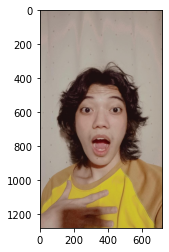

In [40]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [41]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [42]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [43]:
gray.shape

(1280, 720)

In [44]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

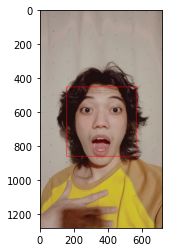

In [45]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

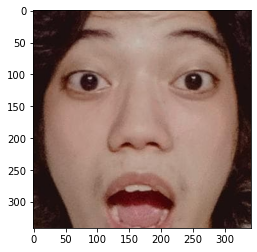

In [46]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [47]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image,axis =0)
final_image=final_image/255.0

In [48]:
Predictions =new_model.predict(final_image)

In [55]:
Predictions[0]

array([0.8224199 , 0.02059183, 0.04491007, 0.0663581 , 0.00231336,
       0.01042239, 0.03298434], dtype=float32)

In [57]:
np.argmax(Predictions)

0

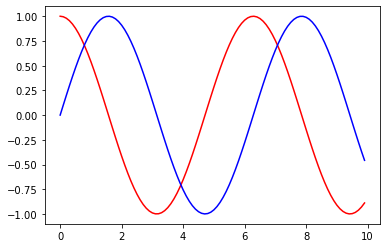

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from deepface import DeepFace
x=np.arange(0,10,0.1)
a=np.cos(x)
b=np.sin(x)
pl.plot(x,a,'r')
pl.plot(x,b,'b')
pl.show()

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:29<00:00,  7.49s/it]


{'region': {'x': 0, 'y': 0, 'w': 1280, 'h': 720},
 'emotion': {'angry': 1.4596302796727832e-06,
  'disgust': 1.129269798510381e-08,
  'fear': 1.877792154687971e-05,
  'happy': 98.64381535575573,
  'sad': 0.006919389222219419,
  'surprise': 6.794058108890371e-05,
  'neutral': 1.349180166325589},
 'dominant_emotion': 'happy',
 'age': 34,
 'gender': 'Man',
 'race': {'asian': 89.88648653030396,
  'indian': 0.9665569290518761,
  'black': 0.04738482821267098,
  'white': 0.7641626056283712,
  'middle eastern': 0.049887975910678506,
  'latino hispanic': 8.28552171587944},
 'dominant_race': 'asian'}

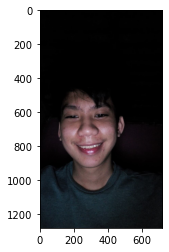

In [14]:
img = cv2.imread('jcoronan.jpg')
plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
predictions = DeepFace.analyze(img)
predictions

In [8]:
from deepface import DeepFace|

In [16]:
img = cv2.imread('zerda.jpg')

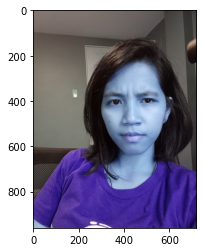

In [17]:
plt.imshow(img)

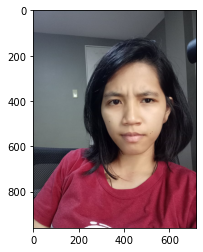

In [18]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [19]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:23<00:00,  5.91s/it]


In [20]:
predictions

{'region': {'x': 0, 'y': 0, 'w': 960, 'h': 720},
 'emotion': {'angry': 11.53842955827713,
  'disgust': 0.00014817213696005638,
  'fear': 2.9150016605854034,
  'happy': 0.027432272327132523,
  'sad': 32.65829086303711,
  'surprise': 0.001982248795684427,
  'neutral': 52.85871624946594},
 'dominant_emotion': 'neutral',
 'age': 27,
 'gender': 'Man',
 'race': {'asian': 31.915267477599684,
  'indian': 10.734447302288139,
  'black': 3.4017342744190366,
  'white': 1.7753364264564007,
  'middle eastern': 0.584484846504349,
  'latino hispanic': 51.58872585431029},
 'dominant_race': 'latino hispanic'}

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:25<00:00,  6.42s/it]


{'region': {'x': 0, 'y': 0, 'w': 2048, 'h': 1365},
 'emotion': {'angry': 0.08864442459634846,
  'disgust': 1.7601797031054284e-05,
  'fear': 2.2389349569842283e-05,
  'happy': 98.99054181688525,
  'sad': 0.0015321071252252794,
  'surprise': 0.005832943530062426,
  'neutral': 0.9134018636164828},
 'dominant_emotion': 'happy',
 'age': 25,
 'gender': 'Man',
 'race': {'asian': 89.5638644695282,
  'indian': 3.1561464071273804,
  'black': 0.3780036233365536,
  'white': 1.2099375016987324,
  'middle eastern': 0.11064866557717323,
  'latino hispanic': 5.581400170922279},
 'dominant_race': 'asian'}

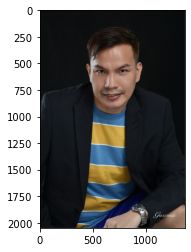

In [21]:
img = cv2.imread('jefferson.jpg')
plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
predictions = DeepFace.analyze(img)
predictions

In [22]:
type(predictions)

dict

In [24]:
predictions['dominant_emotion']

'happy'

In [1]:
import cv2 
import matplotlib.pyplot as plt
from deepface import DeepFace
import numpy as np

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap = cv2.VideoCapture(1)
    if not cap.isOpened():
        raise IOError("Cannot open webcam")

while True:
            ret,frame = cap.read()
            result = DeepFace.analyze(frame, actions = ['emotion'])
            result = DeepFace.analyze(frame, actions = ['gender'])
            result = DeepFace.analyze(frame, actions = ['race'])
            
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            
            faces = faceCascade.detectMultiScale(gray,1.1,4)
            
            for(x, y, w, h) in faces:
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
                
                font = cv2.FONT_HERSHEY_SIMPLEX
                
                cv2.putText(frame, result['dominant_emotion'], (50, 200), font, 1, (0, 255, 0), 2, cv2.LINE_4)
                cv2.putText(frame, result['gender'], (50, 230), font, 1, (0, 255, 0), 2, cv2.LINE_4)
                cv2.putText(frame, result['dominant_race'], (50, 260), font, 1, (0, 255, 0), 2, cv2.LINE_4)
                cv2.imshow('FACE EMOTION RECOGNITON',frame)
                    
                if cv2.waitKey(2) & 0xFF == ord('q'):
                        break
                        
                        
                        cap.release()
                        cv2.destroyAllWindows()  
                        break

Action: emotion:  33%|██████████████████████▎                                            | 1/3 [00:20<00:40, 20.41s/it]


KeyboardInterrupt: 